### Data Analysis for Cab Investment


# 1.Loading the libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
from sklearn.preprocessing import OrdinalEncoder
import seaborn as sns
sns.set()


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# 2.Data Intake

## 2.1CAB DATASET UNDERSTANDING


In [ ]:
cabdata = pd.read_csv('drive/MyDrive/Colab Notebooks/dataglacier/Cab_Data.csv')


In [ ]:

cabdata.head(5)

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip
0,10000011,42377,Pink Cab,ATLANTA GA,30.45,370.95,313.635
1,10000012,42375,Pink Cab,ATLANTA GA,28.62,358.52,334.854
2,10000013,42371,Pink Cab,ATLANTA GA,9.04,125.20,97.632
3,10000014,42376,Pink Cab,ATLANTA GA,33.17,377.40,351.602
4,10000015,42372,Pink Cab,ATLANTA GA,8.73,114.62,97.776


Time Analysis -Unit conversion


In [ ]:
from datetime import datetime, timedelta

In [ ]:
def to_date_format(n):
    date_str =(datetime(1899,12,30) + timedelta(n-1)).strftime("%d-%m-%Y")
    date_date =  datetime.strptime(date_str, "%d-%m-%Y")
    return date_date

In [ ]:
cabdata['Date of Travel']=cabdata['Date of Travel'].apply(lambda x:to_date_format(x))

In [ ]:
cabdata=cabdata.sort_values(by=['Date of Travel'])
cabdata=cabdata.reset_index(drop= True )

print('Filas =',cabdata.shape[0], '  y   Columnas = ', cabdata.shape[1])
cabdata.head(10)

Filas = 359392   y   Columnas =  7


,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip
0,10001340,2016-01-01,Yellow Cab,WASHINGTON DC,10.20,202.54,135.8640
1,10000640,2016-01-01,Yellow Cab,CHICAGO IL,15.60,374.66,209.6640
2,10000635,2016-01-01,Yellow Cab,CHICAGO IL,25.08,532.83,337.0752
3,10001001,2016-01-01,Yellow Cab,NEW YORK NY,46.80,1391.91,595.2960
4,10000171,2016-01-01,Pink Cab,SAN DIEGO CA,14.28,269.15,147.0840
5,10001009,2016-01-01,Yellow Cab,PHOENIX AZ,30.00,1000.52,403.2000
6,10000605,2016-01-01,Yellow Cab,CHICAGO IL,35.52,760.86,430.5024
7,10001014,2016-01-01,Yellow Cab,SACRAMENTO CA,38.00,1065.42,547.2000
8,10000600,2016-01-01,Yellow Cab,CHICAGO IL,23.75,531.25,336.3000
9,10000182,2016-01-01,Pink Cab,SAN DIEGO CA,2.36,47.89,23.6000


,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip
count,359392.00,359392,359392,359392,359392.00,359392.00,359392.00
unique,NaN,1095,2,19,NaN,NaN,NaN
top,NaN,2018-01-04 00:00:00,Yellow Cab,NEW YORK NY,NaN,NaN,NaN
freq,NaN,2022,274681,99885,NaN,NaN,NaN
first,NaN,2016-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN
last,NaN,2018-12-30 00:00:00,NaN,NaN,NaN,NaN,NaN
mean,10220761.19,NaN,NaN,NaN,22.57,423.44,286.19
std,126805.80,NaN,NaN,NaN,12.23,274.38,157.99
min,10000011.00,NaN,NaN,NaN,1.90,15.60,19.00
25%,10110809.75,NaN,NaN,NaN,12.00,206.44,151.20


In [ ]:
cabdata.dtypes

Transaction ID             int64
Date of Travel    datetime64[ns]
Company                   object
City                      object
KM Travelled             float64
Price Charged            float64
Cost of Trip             float64
dtype: object

Transaction ID- unique id for each transaction

Date of Travel - date of each ride

Company- name of the company which provided the cab for ride

KM Travelled- distance travelled by cab in KMs

Price Charged- amount charged to the customer for the ride

Cost of Trip- actual cost of the trip

## 2.2 CITY DATASET UNDERSTANDING


In [ ]:

city = pd.read_csv('drive/MyDrive/Colab Notebooks/dataglacier/City.csv')
print(city.shape)
city.head(5)


(20, 3)


,City,Population,Users
0,NEW YORK NY,"8,405,837","302,149"
1,CHICAGO IL,"1,955,130","164,468"
2,LOS ANGELES CA,"1,595,037","144,132"
3,MIAMI FL,"1,339,155","17,675"
4,SILICON VALLEY,"1,177,609","27,247"


In [ ]:
city.dtypes

City          object
Population    object
Users         object
dtype: object

City-name of city

Population -total number of population

Users- number of cab users in the specific city

## 2.3 CUSTOMER DATASET UNDERSTANDING

In [ ]:
customerid = pd.read_csv('drive/MyDrive/Colab Notebooks/dataglacier/Customer_ID.csv')
print(customerid.shape)
customerid.head(5)

(49171, 4)


,Customer ID,Gender,Age,Income (USD/Month)
0,29290,Male,28,10813
1,27703,Male,27,9237
2,28712,Male,53,11242
3,28020,Male,23,23327
4,27182,Male,33,8536


In [ ]:
customerid.dtypes

Customer ID            int64
Gender                object
Age                    int64
Income (USD/Month)     int64
dtype: object

Customer ID- unique customer ID

Gender

Age

Income - monthly income in USD for each customer

## 2.4 TRANSACTION DATASET UNDERSTANDING

In [ ]:
transactionid = pd.read_csv('drive/MyDrive/Colab Notebooks/dataglacier/Transaction_ID.csv')
print(transactionid.shape)
transactionid.head(5)

(440098, 3)


,Transaction ID,Customer ID,Payment_Mode
0,10000011,29290,Card
1,10000012,27703,Card
2,10000013,28712,Cash
3,10000014,28020,Cash
4,10000015,27182,Card


In [ ]:
transactionid.dtypes

Transaction ID     int64
Customer ID        int64
Payment_Mode      object
dtype: object

Transaction ID

Customer ID

Payment_Mode- mode of payment for the cab ride

# 3 Data Preprocessing

## 3.1 MASTERDATA CREATION

In [ ]:
masterdata = cabdata.merge(transactionid, on= 'Transaction ID').merge(customerid, on ='Customer ID').merge(city, on = 'City')
print(masterdata.shape)
masterdata.head()

(359392, 14)


,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Customer ID,Payment_Mode,Gender,Age,Income (USD/Month),Population,Users
0,10001340,2016-01-01,Yellow Cab,WASHINGTON DC,10.20,202.54,135.8640,52536,Card,Male,24,10606,"418,859","127,001"
1,10020018,2016-03-25,Yellow Cab,WASHINGTON DC,5.94,88.50,74.1312,52536,Cash,Male,24,10606,"418,859","127,001"
2,10102932,2016-11-08,Pink Cab,WASHINGTON DC,15.21,179.33,153.6210,52536,Cash,Male,24,10606,"418,859","127,001"
3,10164725,2017-04-16,Yellow Cab,WASHINGTON DC,8.08,123.21,104.7168,52536,Card,Male,24,10606,"418,859","127,001"
4,10188478,2017-06-23,Yellow Cab,WASHINGTON DC,13.80,283.74,168.9120,52536,Cash,Male,24,10606,"418,859","127,001"


## 3.2 Data quality assessment

In [ ]:
round(masterdata.describe(include='all'),2)

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Customer ID,Payment_Mode,Gender,Age,Income (USD/Month),Population,Users
count,359392.00,359392,359392,359392,359392.00,359392.00,359392.00,359392.00,359392,359392,359392.00,359392.00,359392,359392
unique,NaN,1095,2,19,NaN,NaN,NaN,NaN,2,2,NaN,NaN,19,19
top,NaN,2018-01-04 00:00:00,Yellow Cab,NEW YORK NY,NaN,NaN,NaN,NaN,Card,Male,NaN,NaN,"8,405,837","302,149"
freq,NaN,2022,274681,99885,NaN,NaN,NaN,NaN,215504,205912,NaN,NaN,99885,99885
first,NaN,2016-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,NaN,2018-12-30 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,10220761.19,NaN,NaN,NaN,22.57,423.44,286.19,19191.65,NaN,NaN,35.34,15048.82,NaN,NaN
std,126805.80,NaN,NaN,NaN,12.23,274.38,157.99,21012.41,NaN,NaN,12.59,7969.41,NaN,NaN
min,10000011.00,NaN,NaN,NaN,1.90,15.60,19.00,1.00,NaN,NaN,18.00,2000.00,NaN,NaN
25%,10110809.75,NaN,NaN,NaN,12.00,206.44,151.20,2705.00,NaN,NaN,25.00,8424.00,NaN,NaN


In [ ]:
masterdata.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 359392 entries, 0 to 359391
Data columns (total 14 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   Transaction ID      359392 non-null  int64         
 1   Date of Travel      359392 non-null  datetime64[ns]
 2   Company             359392 non-null  object        
 3   City                359392 non-null  object        
 4   KM Travelled        359392 non-null  float64       
 5   Price Charged       359392 non-null  float64       
 6   Cost of Trip        359392 non-null  float64       
 7   Customer ID         359392 non-null  int64         
 8   Payment_Mode        359392 non-null  object        
 9   Gender              359392 non-null  object        
 10  Age                 359392 non-null  int64         
 11  Income (USD/Month)  359392 non-null  int64         
 12  Population          359392 non-null  object        
 13  Users               359392 no

In [ ]:
#To print the summary statistics for numerical columns
masterdata.describe()

,Transaction ID,KM Travelled,Price Charged,Cost of Trip,Customer ID,Age,Income (USD/Month)
count,3.593920e+05,359392.000000,359392.000000,359392.000000,359392.000000,359392.000000,359392.000000
mean,1.022076e+07,22.567254,423.443311,286.190113,19191.652115,35.336705,15048.822937
std,1.268058e+05,12.233526,274.378911,157.993661,21012.412463,12.594234,7969.409482
min,1.000001e+07,1.900000,15.600000,19.000000,1.000000,18.000000,2000.000000
25%,1.011081e+07,12.000000,206.437500,151.200000,2705.000000,25.000000,8424.000000
50%,1.022104e+07,22.440000,386.360000,282.480000,7459.000000,33.000000,14685.000000
75%,1.033094e+07,32.960000,583.660000,413.683200,36078.000000,42.000000,21035.000000
max,1.044011e+07,48.000000,2048.030000,691.200000,60000.000000,65.000000,35000.000000


## 3.3 Data Cleaning

### 3.3.1 Checking for  Missing Values

In [ ]:
# Convert '?' to NaN
masterdata[masterdata == '?'] = np.nan

# Print the number of NaNs
print(masterdata.isnull().sum())

# Print shape of original DataFrame
print("Shape of Original DataFrame: ", masterdata.shape)

Transaction ID        0
Date of Travel        0
Company               0
City                  0
KM Travelled          0
Price Charged         0
Cost of Trip          0
Customer ID           0
Payment_Mode          0
Gender                0
Age                   0
Income (USD/Month)    0
Population            0
Users                 0
dtype: int64
Shape of Original DataFrame:  (359392, 14)


### 3.3.2 Identifying single-valued columns

In [ ]:
print(masterdata.nunique().sort_values(ascending=True).reset_index(name='count'))

                 index   count
0              Company       2
1         Payment_Mode       2
2               Gender       2
3                 City      19
4           Population      19
5                Users      19
6                  Age      48
7         KM Travelled     874
8       Date of Travel    1095
9         Cost of Trip   16291
10  Income (USD/Month)   22725
11         Customer ID   46148
12       Price Charged   99176
13      Transaction ID  359392


### 3.3.3 Checking  duplicates

In [ ]:
# Calculate duplicates
dups = masterdata.duplicated()
print(dups.any())

# List all duplicate rows
print(masterdata[dups])

False
Empty DataFrame
Columns: [Transaction ID, Date of Travel, Company, City, KM Travelled, Price Charged, Cost of Trip, Customer ID, Payment_Mode, Gender, Age, Income (USD/Month), Population, Users]
Index: []


### 3.3.4 Finding Outliers

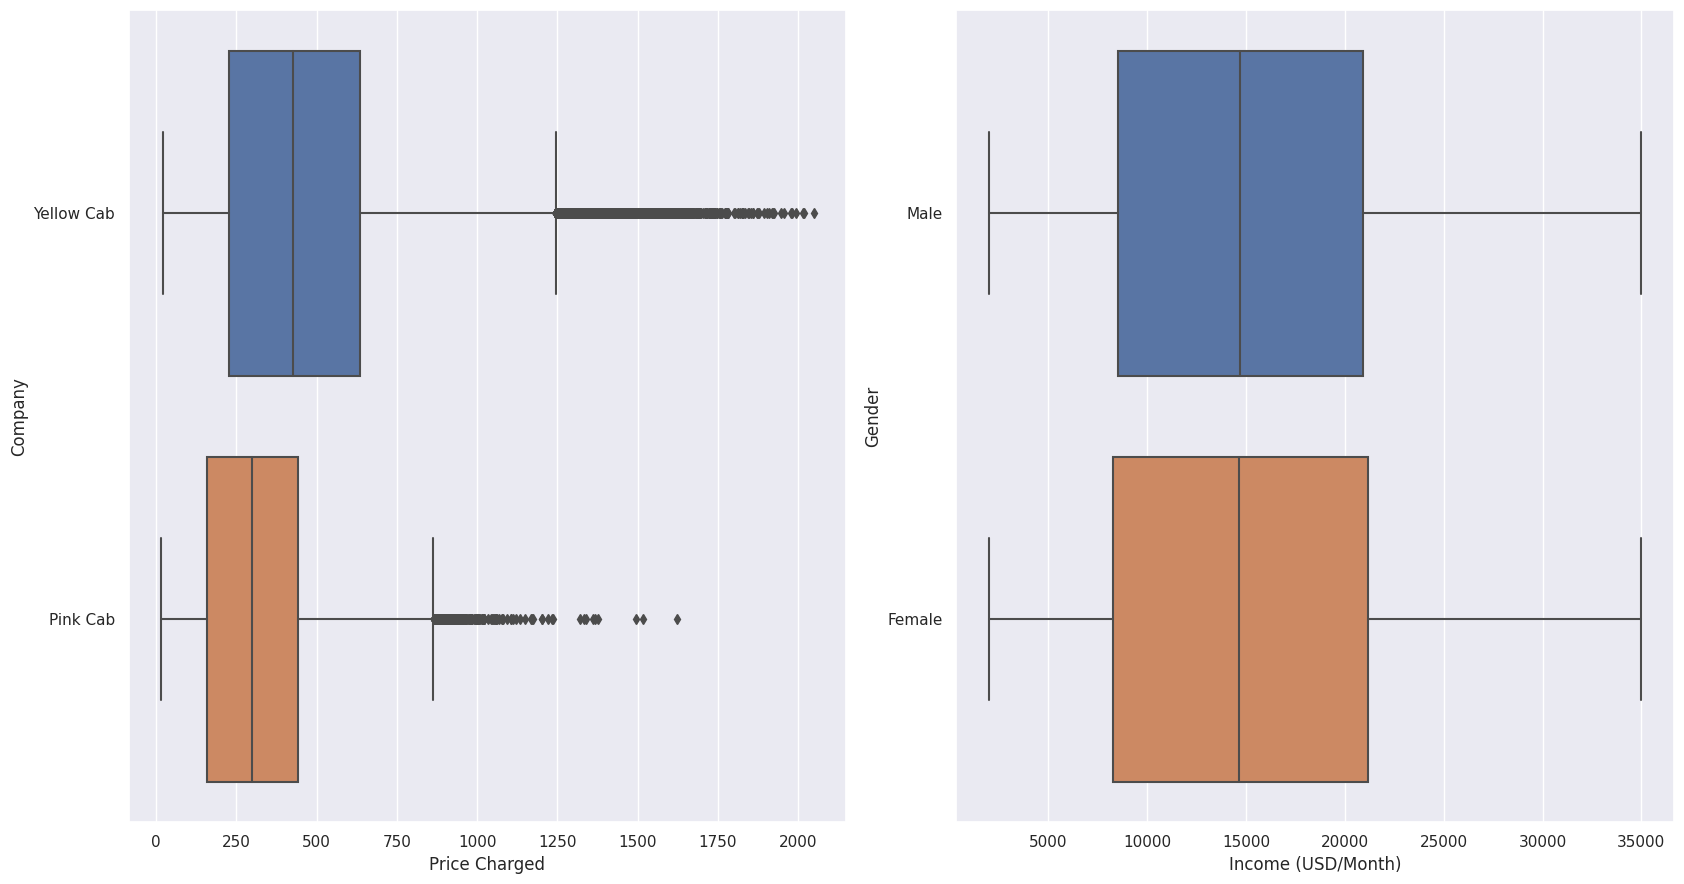

In [ ]:
plt.figure(figsize=(17,9))

plt.subplot(1,2,1)
sns.boxplot(data = masterdata, y = 'Company', x = "Price Charged", dodge=False)

plt.subplot(1,2,2)
sns.boxplot(data = masterdata, y = 'Gender', x = "Income (USD/Month)", dodge=False)

plt.tight_layout()
plt.show()

### 3.3.5 Data transformation

In [ ]:
masterdata['Year of Travel'] = masterdata['Date of Travel'].dt.year
masterdata['Month of Travel'] = masterdata['Date of Travel'].dt.month
masterdata['Day of Travel'] = masterdata['Date of Travel'].dt.day
masterdata['Profit'] = masterdata['Price Charged'] -masterdata['Cost of Trip']

In [ ]:
masterdata_st=masterdata.set_index('Date of Travel')

In [ ]:
masterdata_st.sort_values('Date of Travel').head()

,Transaction ID,Company,City,KM Travelled,Price Charged,Cost of Trip,Customer ID,Payment_Mode,Gender,Age,Income (USD/Month),Population,Users,Year of Travel,Month of Travel,Day of Travel,Profit
Date of Travel,,,,,,,,,,,,,,,,,
2016-01-01,10001340,Yellow Cab,WASHINGTON DC,10.20,202.54,135.8640,52536,Card,Male,24,10606,"418,859","127,001",2016,1,1,66.6760
2016-01-01,10001254,Yellow Cab,SILICON VALLEY,42.12,1342.05,520.6032,13894,Card,Male,32,21898,"1,177,609","27,247",2016,1,1,821.4468
2016-01-01,10001242,Yellow Cab,SILICON VALLEY,18.02,658.65,240.0264,14513,Card,Male,62,3892,"1,177,609","27,247",2016,1,1,418.6236
2016-01-01,10000885,Yellow Cab,NEW YORK NY,32.20,940.73,452.0880,1698,Card,Male,23,22120,"8,405,837","302,149",2016,1,1,488.6420
2016-01-01,10000961,Yellow Cab,NEW YORK NY,19.04,634.46,253.6128,85,Card,Male,19,19765,"8,405,837","302,149",2016,1,1,380.8472


# 4 .Explanatory Data Analysis

In [ ]:
masterdata.dtypes

Transaction ID                 int64
Date of Travel        datetime64[ns]
Company                       object
City                          object
KM Travelled                 float64
Price Charged                float64
Cost of Trip                 float64
Customer ID                    int64
Payment_Mode                  object
Gender                        object
Age                            int64
Income (USD/Month)           float64
Population                    object
Users                         object
Year of Travel                 int64
Month of Travel                int64
Day of Travel                  int64
Profit                       float64
dtype: object

In [ ]:
# Calculate the mean  price, min, and max sale prices

mean_price = masterdata['Price Charged'].mean()
min_price = masterdata['Price Charged'].min()
max_price = masterdata['Price Charged'].max()
median_price = masterdata['Price Charged'].median()



# Print the results
print("Average price: ", mean_price)
print("Lowest price: ", min_price)
print("Highest price: ", max_price)
print("Median price: ", median_price)

Average price:  423.44331125901516
Lowest price:  15.6
Highest price:  2048.03
Median price:  386.36


## 4.1 Features Analysis

### 4.1.1 Kilometres  Travelled Distribution

Text(0.5, 0, 'Km Travelled')

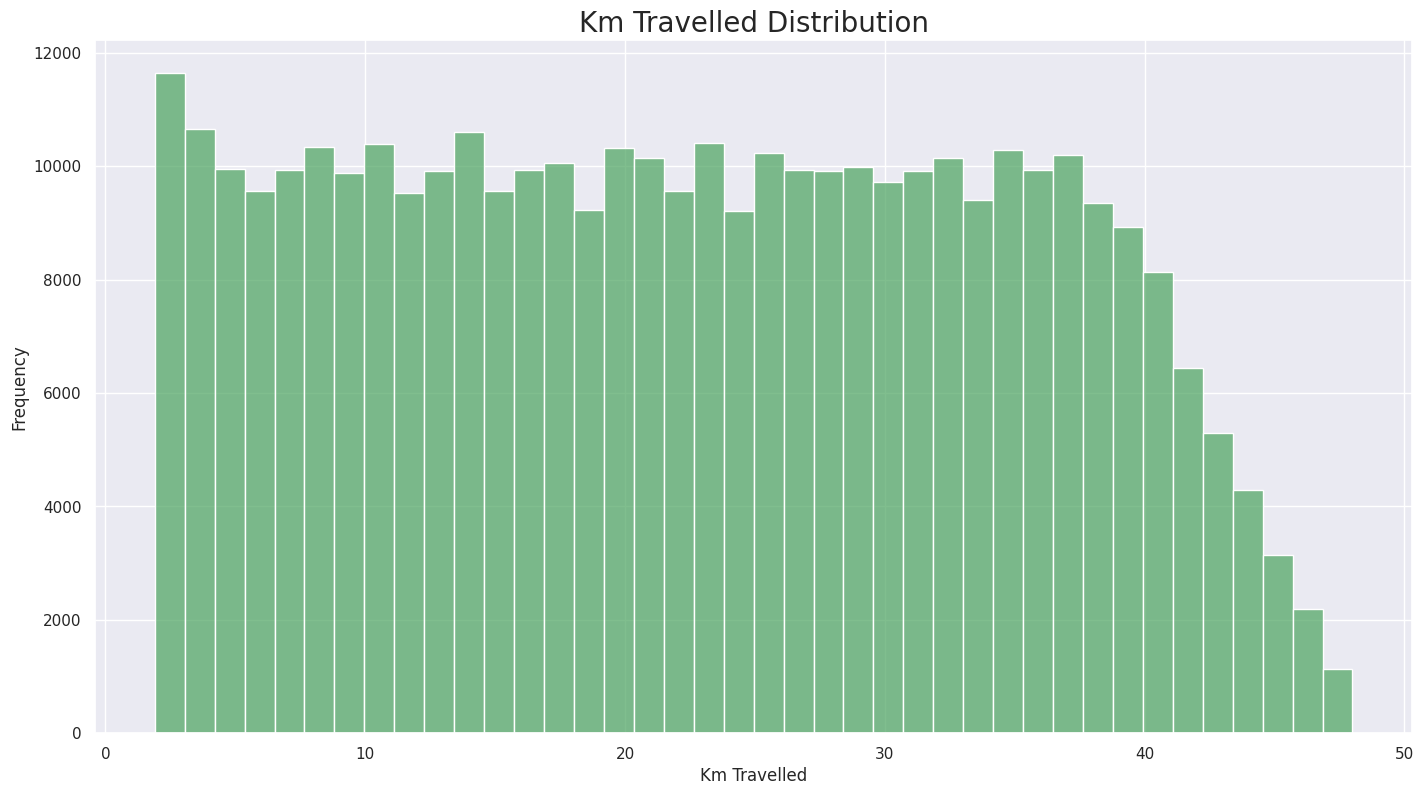

In [ ]:
plt.figure(figsize=(17,9))
ax=sns.histplot(data=masterdata, x="KM Travelled",bins=40, color= 'g')
plt.title('Km Travelled Distribution', fontsize=20)
plt.ylabel('Frequency')
plt.xlabel('Km Travelled')

 After 40KM there is gradual linear decrease in number of rides


### 4.1.2 Price Distribution

Text(0.5, 0, 'Price Charged')

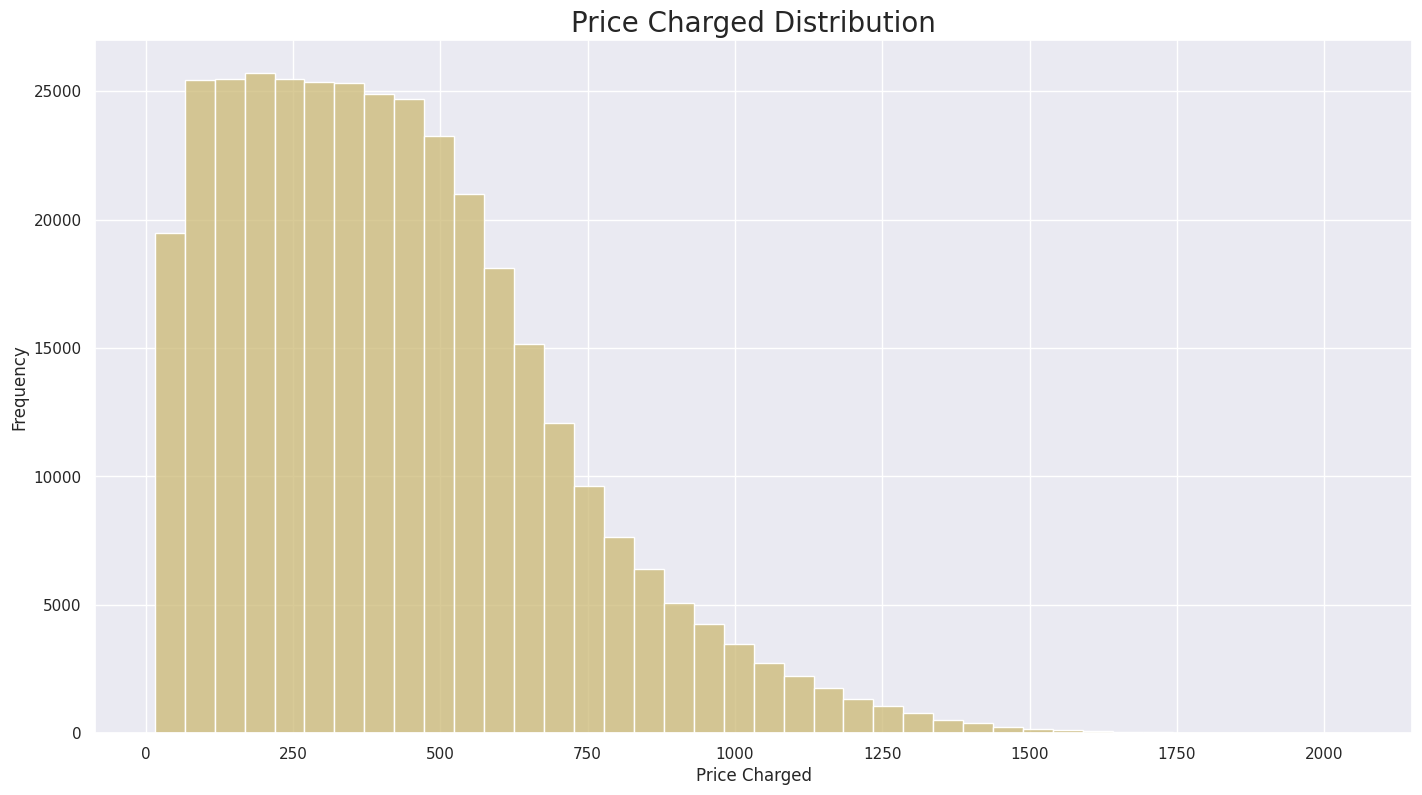

In [ ]:
plt.figure(figsize=(17,9))
sns.histplot(data=masterdata, x="Price Charged",bins=40 , color= 'y')
plt.title('Price Charged Distribution', fontsize=20)
plt.ylabel('Frequency')
plt.xlabel('Price Charged')

 After 400, there is an exponential decrease in number of rides



### 4.1.3 Cost of Trip Distribution

Text(0.5, 0, 'Cost of Trip')

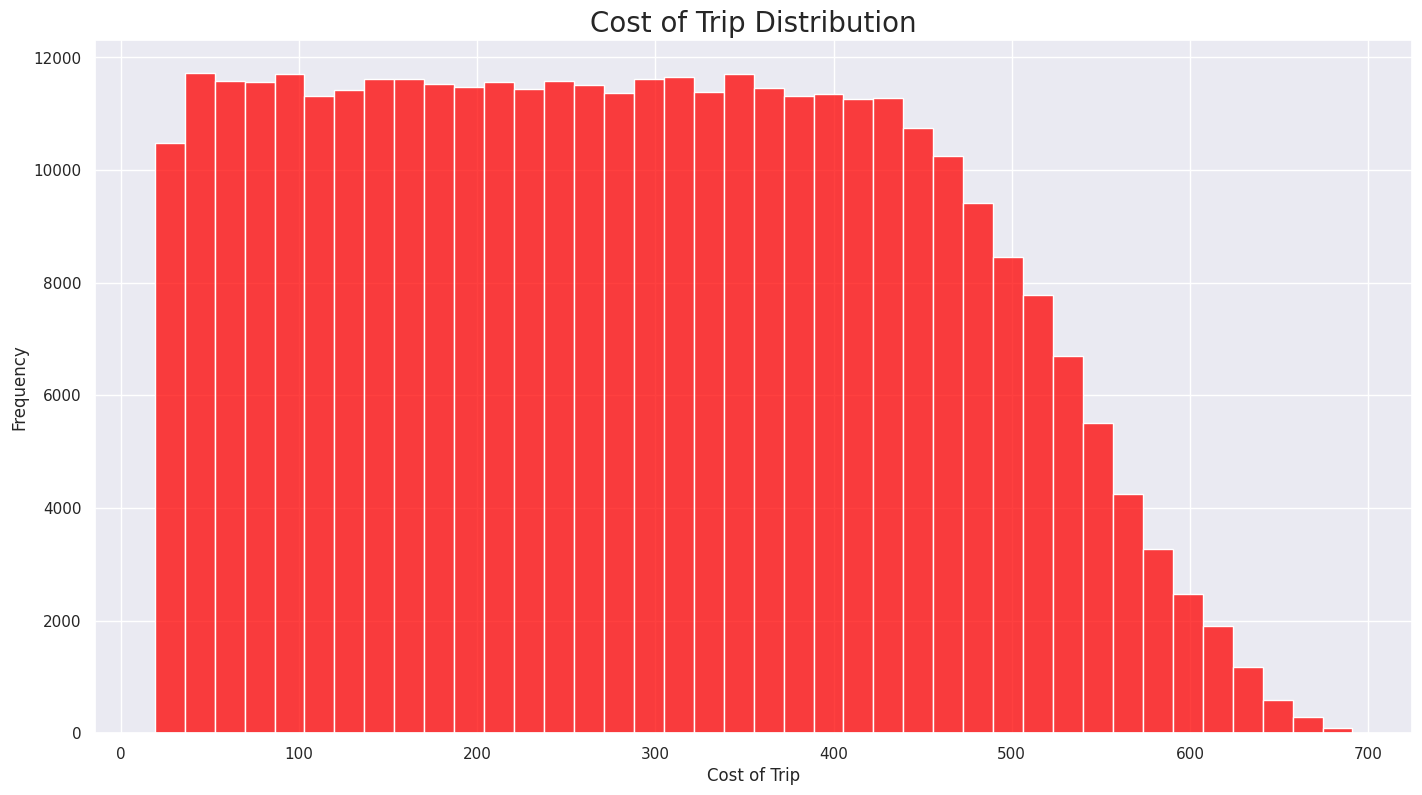

In [ ]:
plt.figure(figsize=(17,9))
sns.histplot(data= masterdata,x="Cost of Trip",bins=40 , color= 'red')
plt.title('Cost of Trip Distribution', fontsize=20)
plt.ylabel('Frequency')
plt.xlabel('Cost of Trip')

After around 420 there is linear decrease in number of rides till it reaches 0 around700

### 4.1.4 Age Distribution

Text(0.5, 0, 'Age')

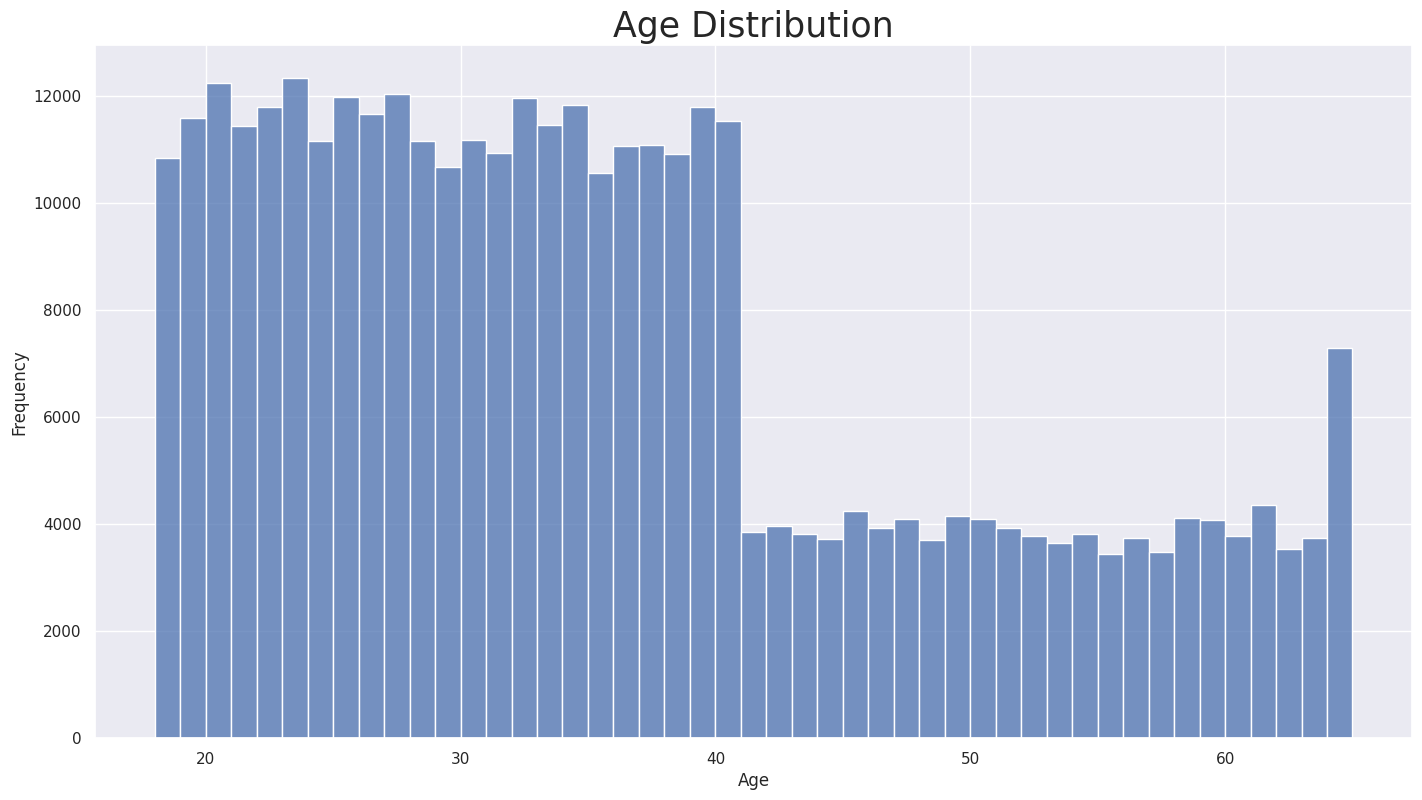

In [ ]:
plt.figure(figsize=(17,9))
sns.histplot(data=masterdata, x='Age', bins=47)
plt.title('Age Distribution', fontsize=25)
plt.ylabel('Frequency')
plt.xlabel('Age')

After the age of 40 there is a sudden drop in number of passengers. People below 40 years tend to travel a lot

### 4.1.5 COST per KM

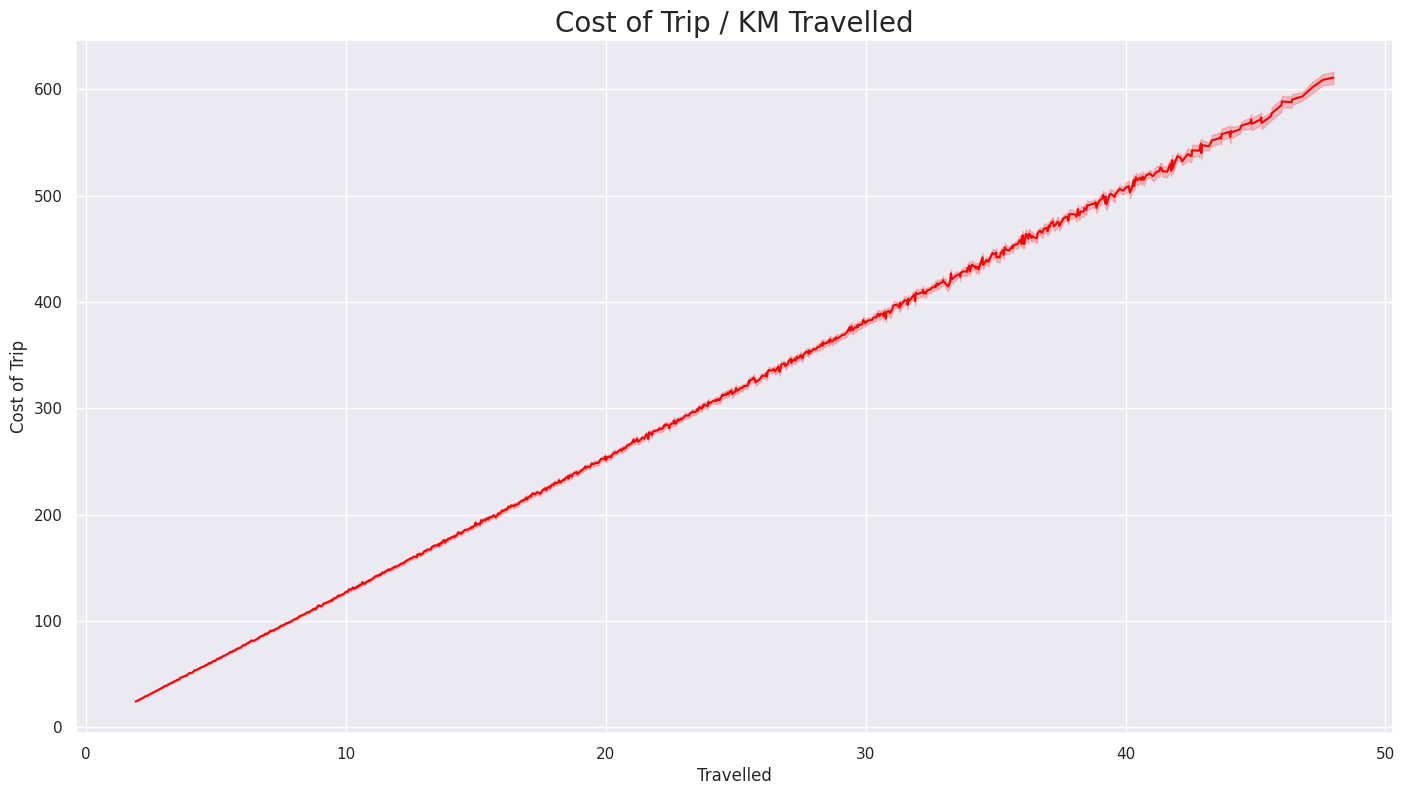

In [ ]:
plt.figure(figsize=(17,9))
sns.lineplot(data=masterdata, x="KM Travelled",y='Cost of Trip', color= 'red')
plt.title('Cost of Trip / KM Travelled', fontsize=20)
plt.xlabel('Travelled')
plt.ylabel('Cost of Trip')
plt.show()

Cost of the trip tends to increases with the   kilometers travelling

### 4.1.6 Customer Payment Mode preference

Text(0.5, 0, 'Payment Mode')

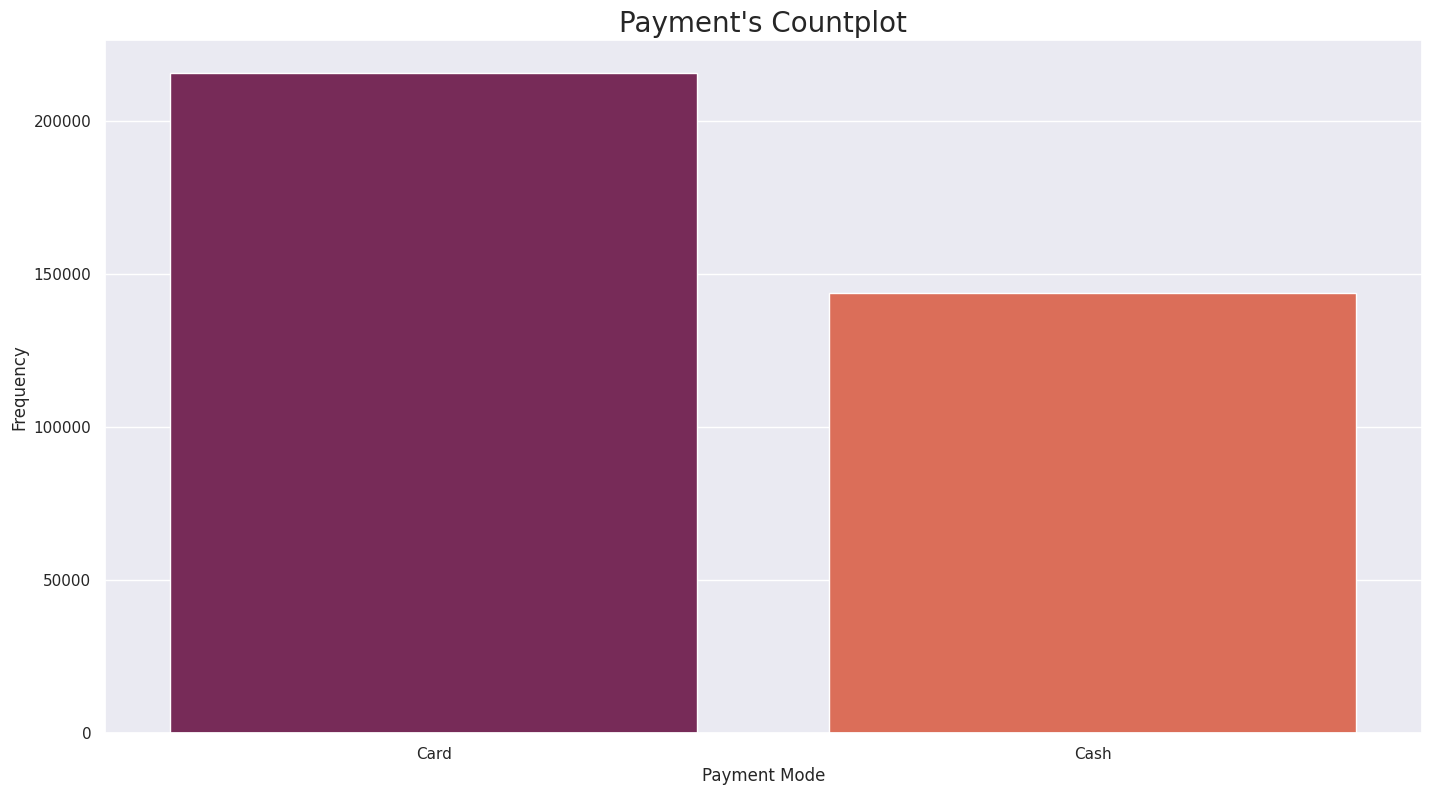

In [ ]:
plt.figure(figsize=(17,9))
sns.countplot(data=masterdata, x="Payment_Mode", palette='rocket')
plt.title("Payment's Countplot", fontsize=20)
plt.ylabel('Frequency')
plt.xlabel('Payment Mode')

Most of the customers preferred for card payment

### 4.1.7 Gender Preference for Cab Booking

Text(0.5, 0, 'Gender')

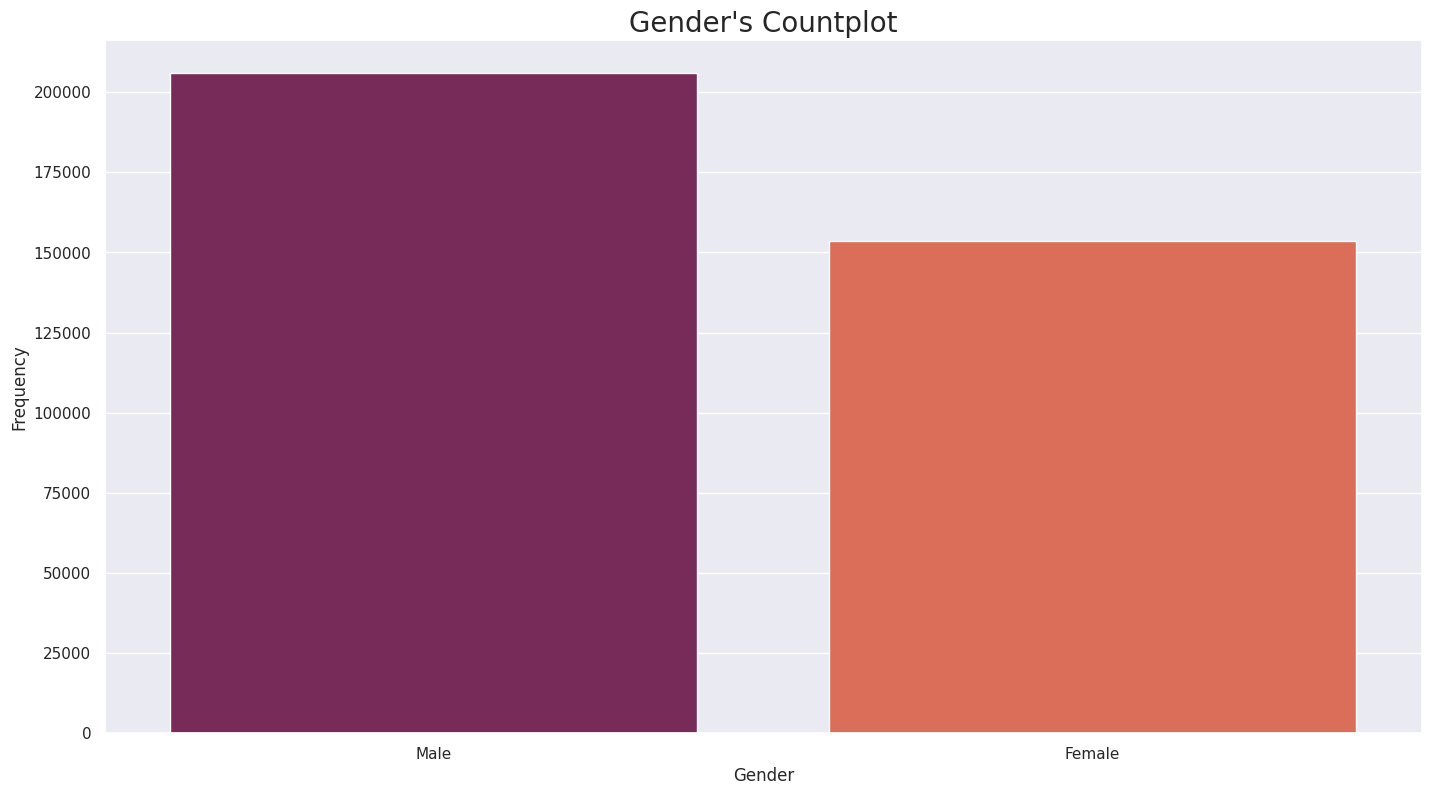

In [ ]:
plt.figure(figsize=(17,9))
sns.countplot(data=masterdata, x="Gender", palette='rocket')
plt.title("Gender's Countplot", fontsize=20)
plt.ylabel('Frequency')
plt.xlabel('Gender')

Male customers are more preferred for booking cab than female customers

## 4.2 Time series

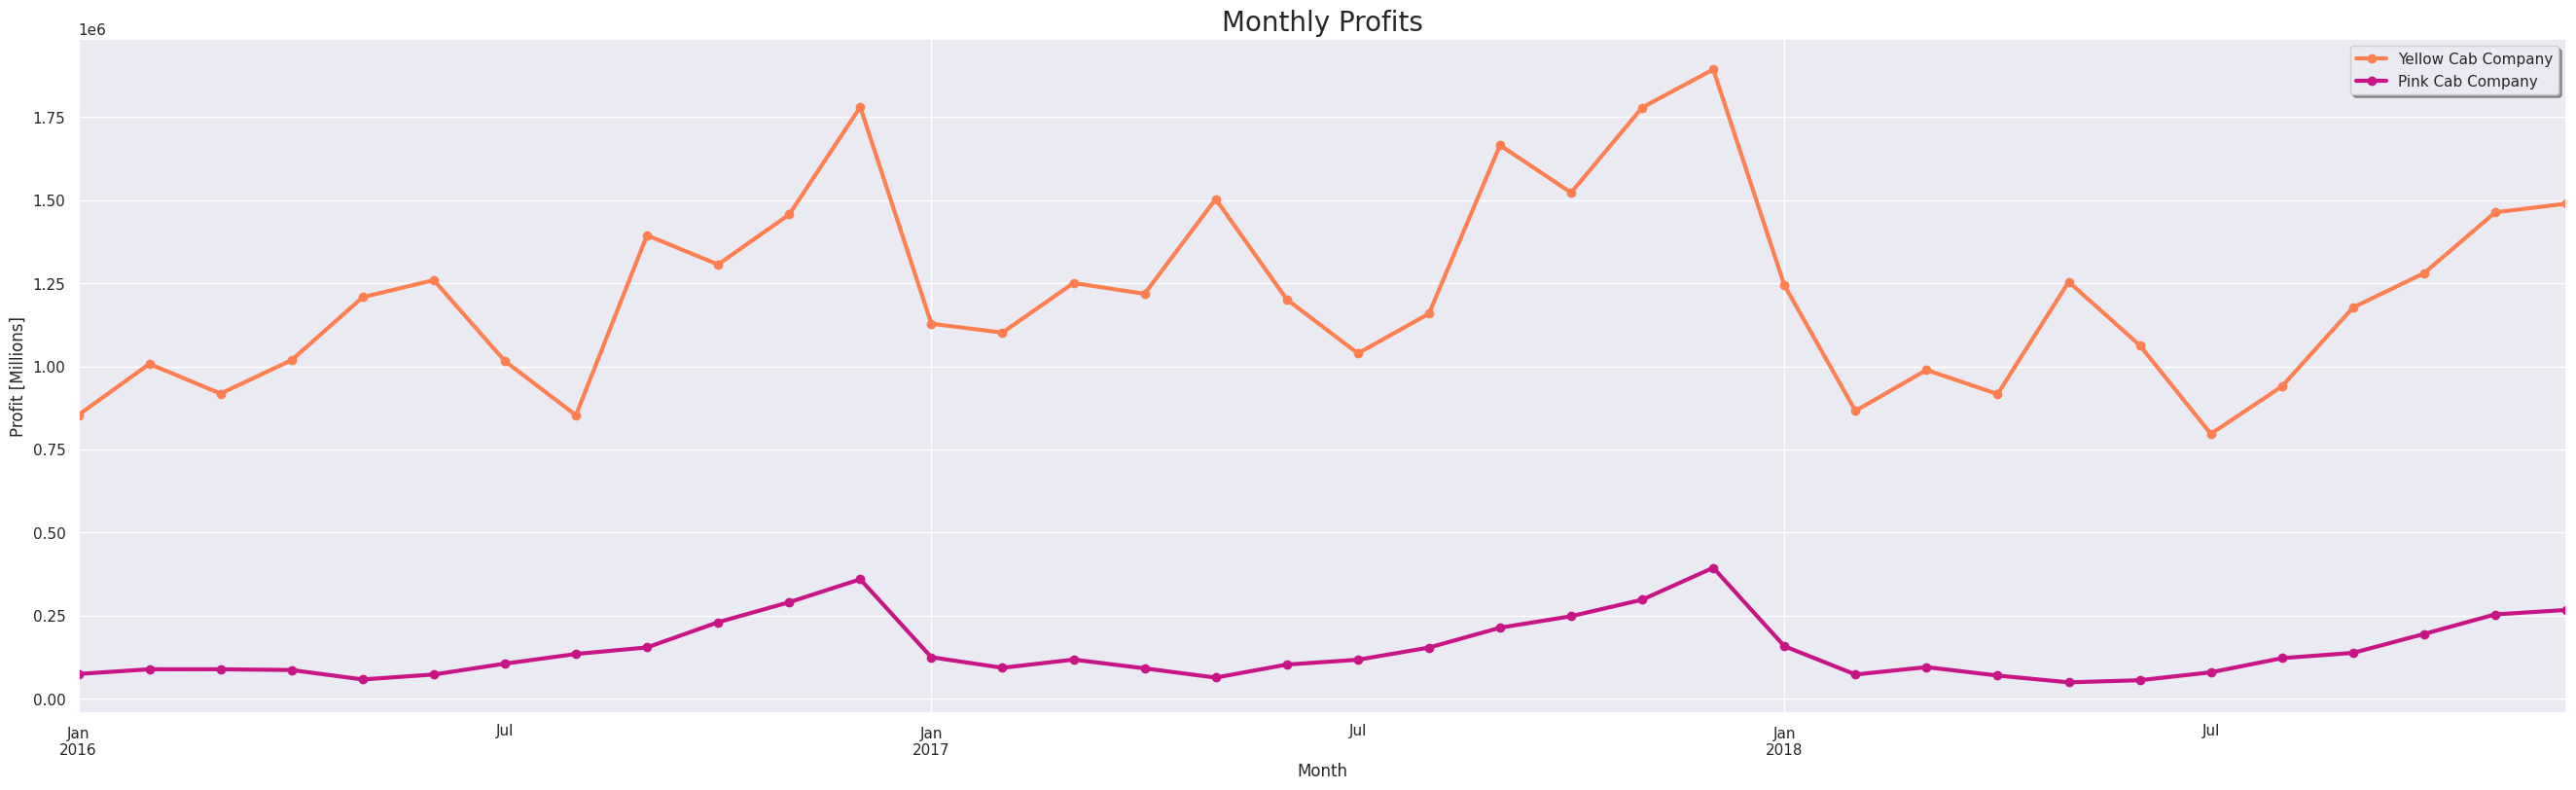

In [ ]:
plt.figure(figsize=(33,9))

fig= yellowcabst.Profit.resample('m').sum().plot.line(color = 'coral',label='Yellow Cab Company',linewidth=3, marker ='o')
fig=pinkcabst.Profit.resample('m').sum().plot.line(color = 'mediumvioletred',label='Pink Cab Company',linewidth=3, marker='o')
plt.ylabel('Profit [Millions]')
plt.title('Monthly Profits',fontsize=20)
plt.xlabel('Month')
plt.legend(loc='best', shadow=True)

YellowCab Company's earnings are more stable, with fluctuations of 23,08%, while those of the PinkCab Company's vary in the order of 61,22%

## 4.3 Numerical features


Question :Check if any correlation between the data is present and visualise the correlation matrix

In [ ]:
corr=masterdata.corr()
corr

,Transaction ID,KM Travelled,Price Charged,Cost of Trip,Customer ID,Age,Income (USD/Month),Year of Travel,Month of Travel,Day of Travel,Profit
Transaction ID,1.000000,-0.001429,-0.052902,-0.003462,-0.016912,-0.001267,-0.001570,0.941475,0.284724,0.014824,-0.087130
KM Travelled,-0.001429,1.000000,0.835753,0.981848,0.000389,-0.000369,-0.000544,-0.001094,-0.001773,0.000767,0.462768
Price Charged,-0.052902,0.835753,1.000000,0.859812,-0.177324,-0.003084,0.003228,-0.036903,-0.059639,-0.006820,0.864154
Cost of Trip,-0.003462,0.981848,0.859812,1.000000,0.003077,-0.000189,-0.000633,-0.001766,-0.008309,0.000726,0.486056
Customer ID,-0.016912,0.000389,-0.177324,0.003077,1.000000,-0.004735,-0.013608,-0.002480,-0.045030,0.000763,-0.306527
Age,-0.001267,-0.000369,-0.003084,-0.000189,-0.004735,1.000000,0.003907,-0.000497,-0.002376,-0.002291,-0.005093
Income (USD/Month),-0.001570,-0.000544,0.003228,-0.000633,-0.013608,0.003907,1.000000,-0.001679,0.000585,0.000927,0.006148
Year of Travel,0.941475,-0.001094,-0.036903,-0.001766,-0.002480,-0.000497,-0.001679,1.000000,-0.033169,-0.022449,-0.061420
Month of Travel,0.284724,-0.001773,-0.059639,-0.008309,-0.045030,-0.002376,0.000585,-0.033169,1.000000,0.055164,-0.093886
Day of Travel,0.014824,0.000767,-0.006820,0.000726,0.000763,-0.002291,0.000927,-0.022449,0.055164,1.000000,-0.012388


<Axes: >

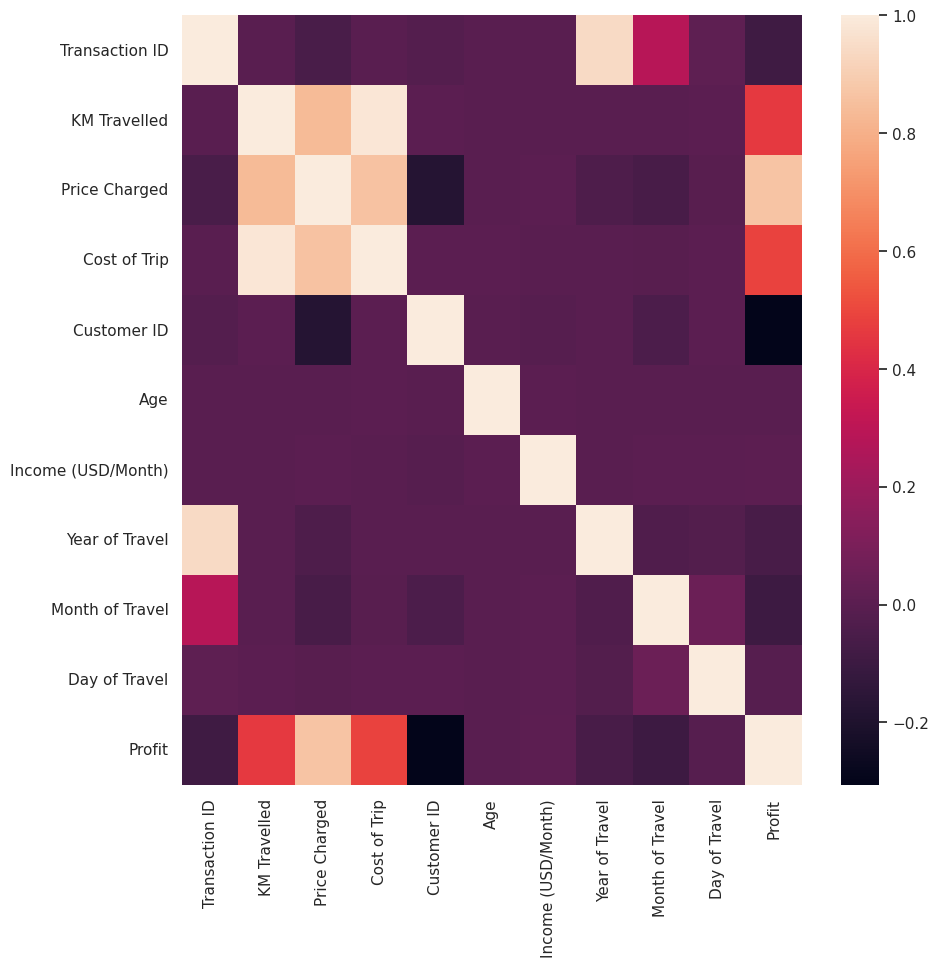

In [ ]:
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(corr, ax=ax)

List of highly correlated attributes

1. KM_Travelled and Price_Charged
2. KM_Travelled and Cost_of_Trip
3. Price_Charged and Cost_of_Trip


## 4.4 Client Analysis

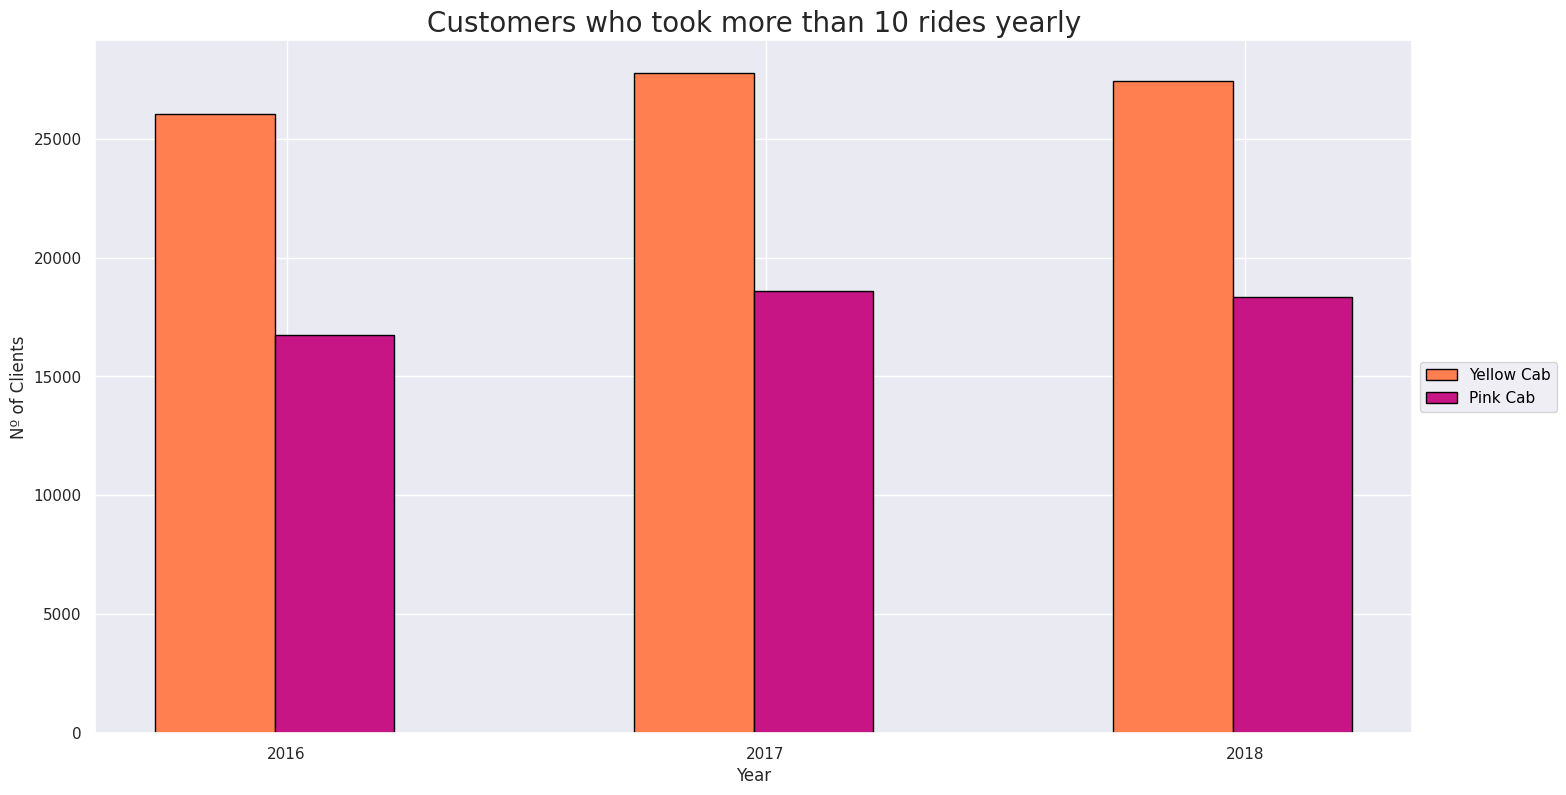

In [ ]:
years=[2016,2017,2018]
c10r_y=[]
c10r_p=[]
for year in years:
  yellow_year=masterdata[(masterdata['Year of Travel']==year) & (masterdata['Company']=='Yellow Cab')].groupby('Customer ID')['Company'].agg(['count'])
  yellow_year.reset_index(inplace=True)
  yellow_year[yellow_year['count']>=10]
  c10r_y.append(len(yellow_year))
  pink_year=masterdata[(masterdata['Year of Travel']==year) & (masterdata['Company']=='Pink Cab')].groupby('Customer ID')['Company'].agg(['count'])
  pink_year.reset_index(inplace=True)
  pink_year[pink_year['count']>=10]
  c10r_p.append(len(pink_year))

plt.figure(figsize=(17,9))
X = np.arange(3)
plt.bar(X+0.00,c10r_y,color='coral', label='Yellow Cab', width= 0.25,edgecolor='black')
plt.bar(X+0.25,c10r_p,color='mediumvioletred',label='Pink Cab',width = 0.25,edgecolor='black')
plt.xticks(X+0.15,['2016','2017','2018'])
leg=plt.gca().legend(loc='center left',bbox_to_anchor = (1,0.5))
plt.setp(leg.get_texts(), color='black')
plt.title('Customers who took more than 10 rides yearly',fontsize=20)
plt.ylabel('Nº of Clients')
plt.xlabel('Year')
plt.show()

 Customers who took more than 10 rides yearly booked for Yellow  Cab

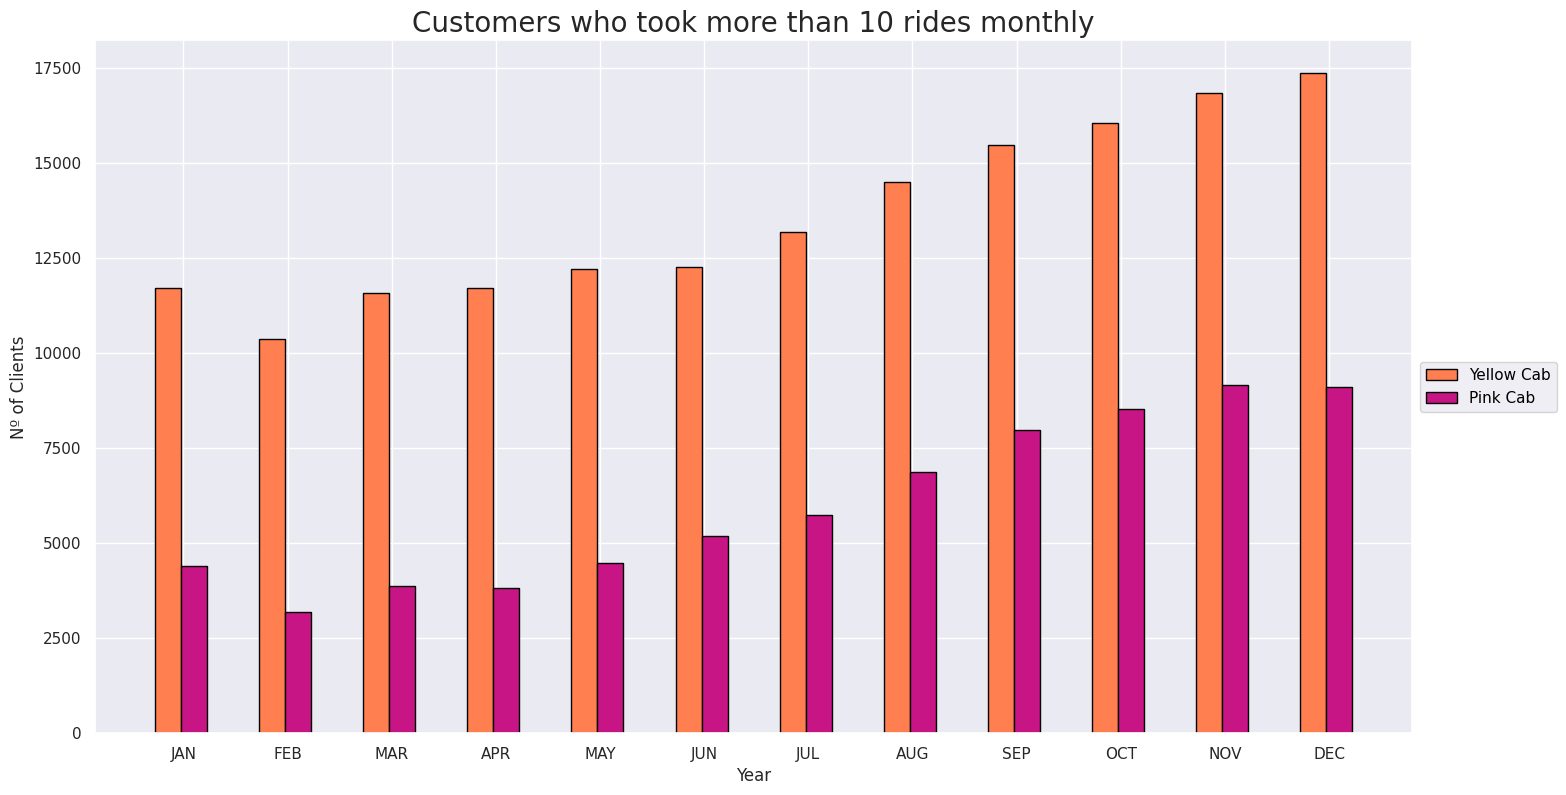

In [ ]:
months=[1,2,3,4,5,6,7,8,9,10,11,12]
c10r_ym=[]
c10r_pm=[]
for month in months:
  yellow_year=masterdata[(masterdata['Month of Travel']==month) & (masterdata['Company']=='Yellow Cab')].groupby('Customer ID')['Company'].agg(['count'])
  yellow_year.reset_index(inplace=True)
  yellow_year[yellow_year['count']>=10]
  c10r_ym.append(len(yellow_year))
  pink_year=masterdata[(masterdata['Month of Travel']==month) & (masterdata['Company']=='Pink Cab')].groupby('Customer ID')['Company'].agg(['count'])
  pink_year.reset_index(inplace=True)
  pink_year[pink_year['count']>=10]
  c10r_pm.append(len(pink_year))

plt.figure(figsize=(17,9))
X = np.arange(12)
plt.bar(X+0.00,c10r_ym,color='coral', label='Yellow Cab', width= 0.25,edgecolor='black')
plt.bar(X+0.25,c10r_pm,color='mediumvioletred',label='Pink Cab',width = 0.25,edgecolor='black')
plt.xticks(X+0.15,['JAN','FEB','MAR','APR','MAY','JUN','JUL','AUG','SEP','OCT','NOV','DEC'])
leg=plt.gca().legend(loc='center left',bbox_to_anchor = (1,0.5))
plt.setp(leg.get_texts(), color='black')
plt.title('Customers who took more than 10 rides monthly',fontsize=20)
plt.ylabel('Nº of Clients')
plt.xlabel('Year')
plt.show()

Customers who took more than 10 rides monthly are also  booked for Yellow cab

In [ ]:
a1=masterdata[(masterdata['Age']>18) & (masterdata['Age']<25)]
a2=masterdata[(masterdata['Age']>26) & (masterdata['Age']<40)]
a3=masterdata[(masterdata['Age']>41) & (masterdata['Age']<60)]
a4=masterdata[(masterdata['Age']>60)]

a11= a1.groupby(['Payment_Mode'])['Customer ID'].agg(['count'])
a11.columns=['Total Customers']
a11=a11.reset_index(level='Payment_Mode', col_level=1)
a11['Class']= '18-25'


a22= a2.groupby(['Payment_Mode'])['Customer ID'].agg(['count'])
a22.columns=['Total Customers']
a22=a22.reset_index(level='Payment_Mode', col_level=1)
a22['Class']= '26-40'


a33= a3.groupby(['Payment_Mode'])['Customer ID'].agg(['count'])
a33.columns=['Total Customers']
a33=a33.reset_index(level='Payment_Mode', col_level=1)
a33['Class']= '40-60'


a44= a4.groupby(['Payment_Mode'])['Customer ID'].agg(['count'])
a44.columns=['Total Customers']
a44=a44.reset_index(level='Payment_Mode', col_level=1)
a44['Class']= '60+'

payage=a11
payage=pd.concat([payage,a22,a33,a44])
payage.head()

x=payage.groupby('Class').sum()
x.columns=['Q']
x=x.reset_index(level='Class', col_level=1)
x.head()

payage=payage.merge(x,on='Class')
payage['per'] = payage['Total Customers']/payage['Q']
payage.head()

,Payment_Mode,Total Customers,Class,Q,per
0,Card,42308,18-25,70525,0.599901
1,Cash,28217,18-25,70525,0.400099
2,Card,87745,26-40,146603,0.598521
3,Cash,58858,26-40,146603,0.401479
4,Card,41843,40-60,69716,0.600192


<Figure size 1500x700 with 0 Axes>

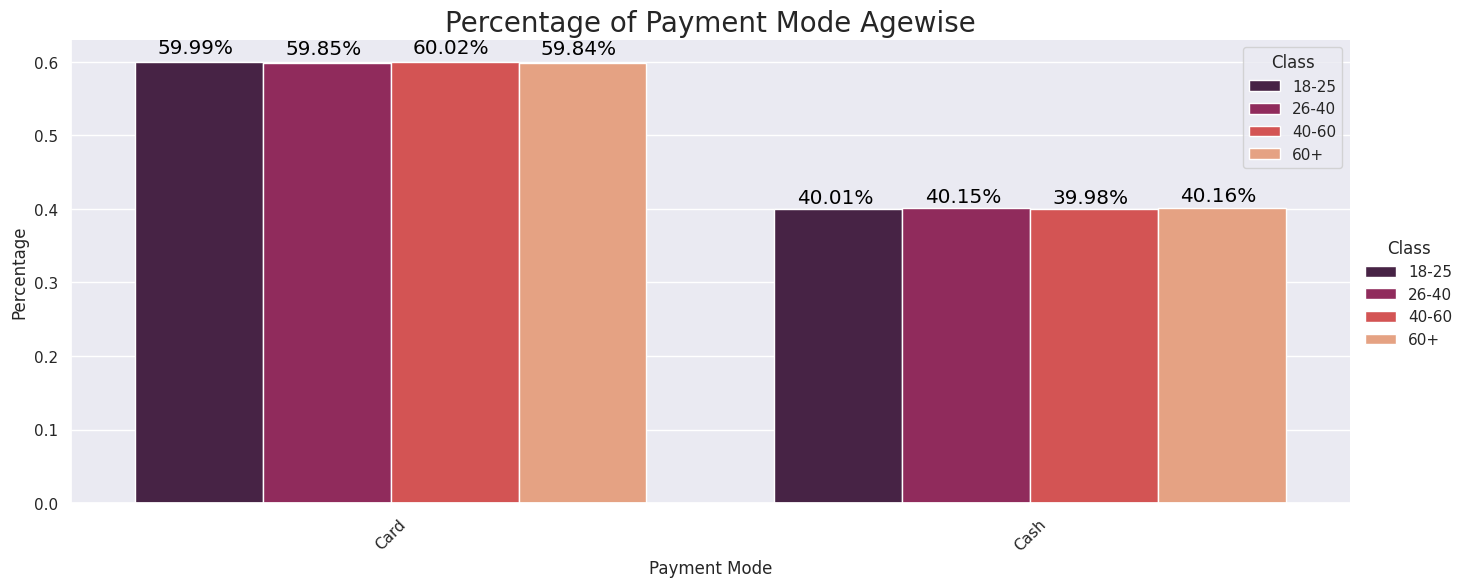

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(15, 7))  # Adjust the figure size as needed

g = sns.catplot(
    x='Payment_Mode',
    y='per',
    data=payage,
    kind='bar',
    hue='Class',
    palette='rocket',
    height=8.27 / 1.5,  # Adjust the height as needed
    aspect=2.5,          # Adjust the aspect ratio as needed
)

ax = g.facet_axis(0, 0)

for p in ax.patches:
    ax.text(
        p.get_x() + 0.035,
        p.get_height() * 1.02,
        "{:.2f}%".format(p.get_height() * 100),
        color='black',
        rotation='horizontal',
        size='large',
    )

plt.title('Percentage of Payment Mode Agewise', fontsize=20)
plt.xlabel('Payment Mode')  # Correct the x-axis label
plt.ylabel('Percentage')
plt.legend(title='Class')   # Add a legend
plt.xticks(rotation=45)     # Rotate x-axis labels if needed for better readability
plt.show()

Around 60 % of customers card payment mode and only 40% people depend on cash payment mode on all age group

## 4.5 Profit Analysis

In [ ]:
h=masterdata.groupby(['Company','City']).Profit.sum().to_frame('Profit Over City')
h=h.reset_index(level='City', col_level=1)
h=h.reset_index(level='Company', col_level=1)
h = h.sort_values(by='Profit Over City', ascending= False )
h=h.drop([28,9],axis=0)
h.head()


,Company,City,Profit Over City
37,Yellow Cab,WASHINGTON DC,3.299104e+06
25,Yellow Cab,LOS ANGELES CA,3.285977e+06
22,Yellow Cab,CHICAGO IL,3.068591e+06
21,Yellow Cab,BOSTON MA,1.506718e+06
6,Pink Cab,LOS ANGELES CA,1.125732e+06


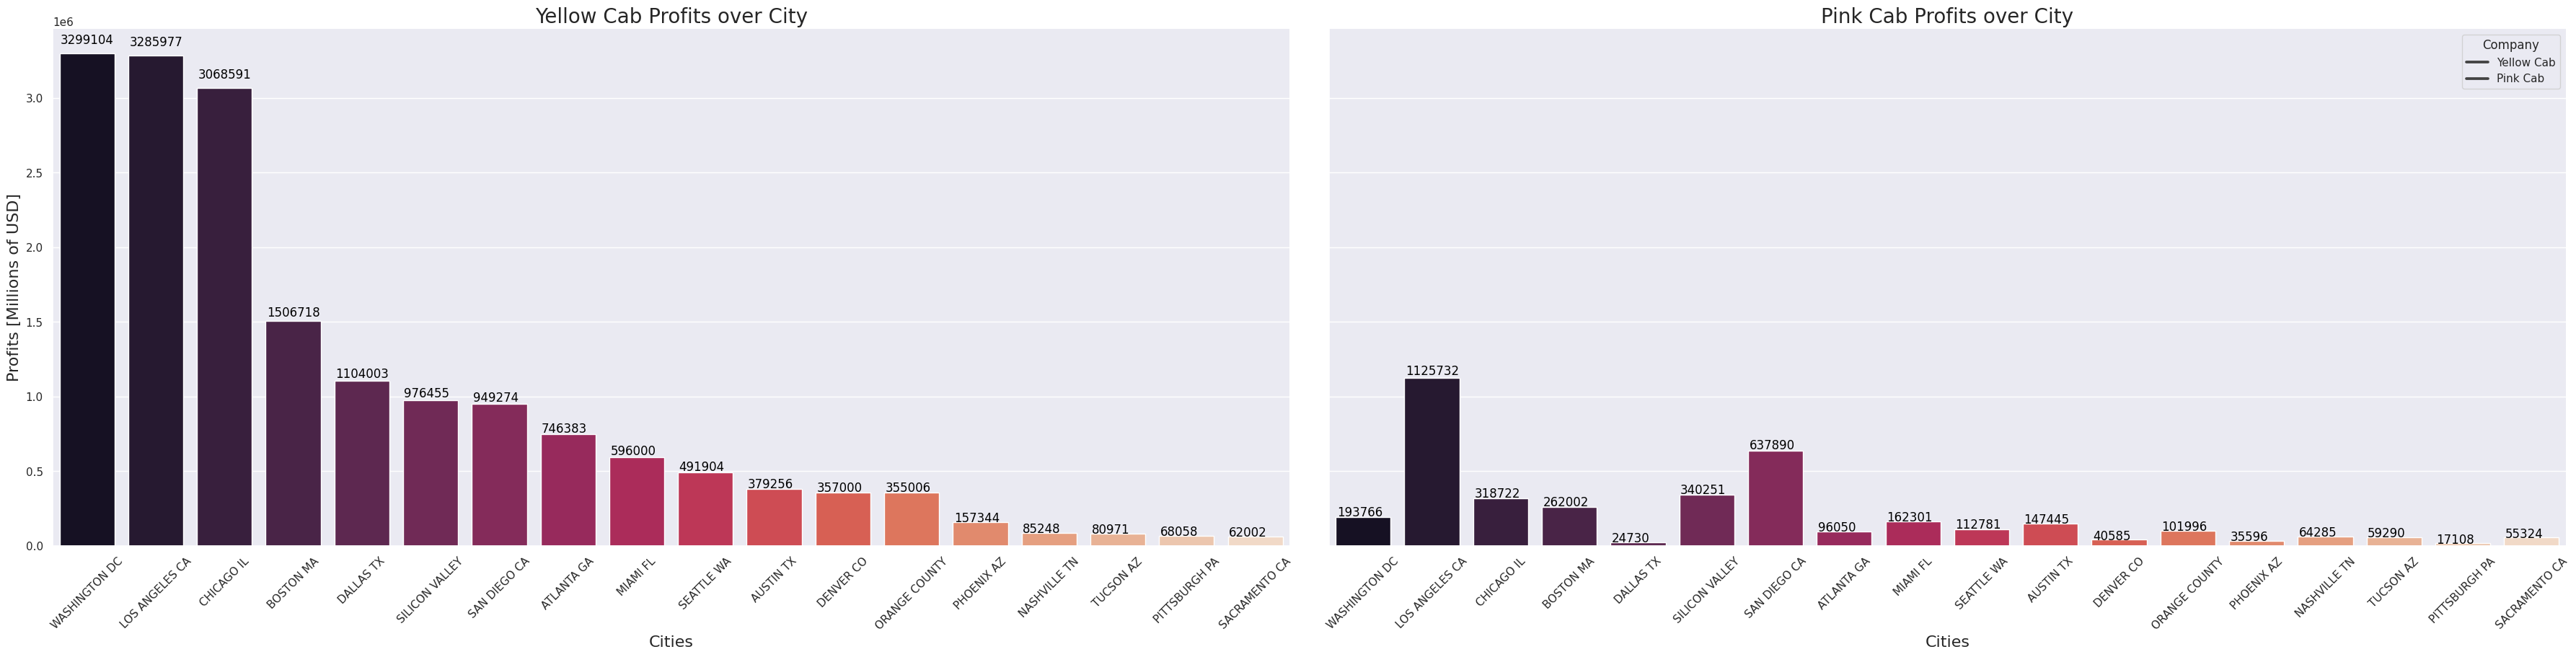

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a grouped bar chart for Yellow Cab and Pink Cab
g = sns.catplot(
    x='City',
    y='Profit Over City',
    data=h,
    kind='bar',
    palette='rocket',
    col='Company',
    height=8.27,
    aspect=18/8.27
)

# Customize each facet (subplot)
for company, ax in zip(['Yellow Cab', 'Pink Cab'], g.axes.flat):
    for p in ax.patches:
        ax.text(
            p.get_x() + 0.015,
            p.get_height() * 1.02,
            "{:.0f}".format(p.get_height()),
            color='black',
            rotation='horizontal',
            size='medium'
        )
    ax.set_ylabel('Profits [Millions of USD]', fontsize=16)
    ax.set_xlabel('Cities', fontsize=16)
    ax.set_title(f'{company} Profits over City', fontsize=20)
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45)


# Add a custom legend
plt.legend(title='Company', labels=['Yellow Cab', 'Pink Cab'])

plt.show()

WASHINGTON DC provide the highest profit for yellow cab and LOS ANGELS CA provide  the highest profit for pink cab

In [ ]:
yellowcabnp=yellowcab[(yellowcab['Profit']<0)]
yellowcabnp= yellowcabnp.City.value_counts()
yellowcabnp=pd.DataFrame(yellowcabnp)
yellowcabnp.columns=['q']
pinkcabnp=pinkcab[(pinkcab['Profit']<0)]
pinkcabnp= pinkcabnp.City.value_counts()
pinkcabnp=pd.DataFrame(pinkcabnp)
pinkcabnp.columns=['q']
yellowcabnp['Q']= yellowcab.City.value_counts() - yellowcabnp['q']
yellowcabnp['per']= ((1- (yellowcabnp['q'] / (yellowcabnp['q']+yellowcabnp['Q'])))*100)
yellowcabnp= yellowcabnp[['Q','q','per']]
yellowcabnp['Q']= yellowcabnp['Q'].astype(int)
yellowcabnp = yellowcabnp.sort_values(by='per', ascending= False )
yellowcabnp.head(30)
yellowcabnp.shape
pinkcabnp['Q']= pinkcab.City.value_counts() - pinkcabnp['q']
pinkcabnp['per']= ((1- (pinkcabnp['q'] / (pinkcabnp['q']+pinkcabnp['Q'])))*100)
pinkcabnp= pinkcabnp[['Q','q','per']]
pinkcabnp['Q']= pinkcabnp['Q'].astype(int)
pinkcabnp = pinkcabnp.sort_values(by='per', ascending= False )
pinkcabnp.head(30)
pinkcabnp.shape

(19, 3)

Text(0.5, 0, 'Cities')

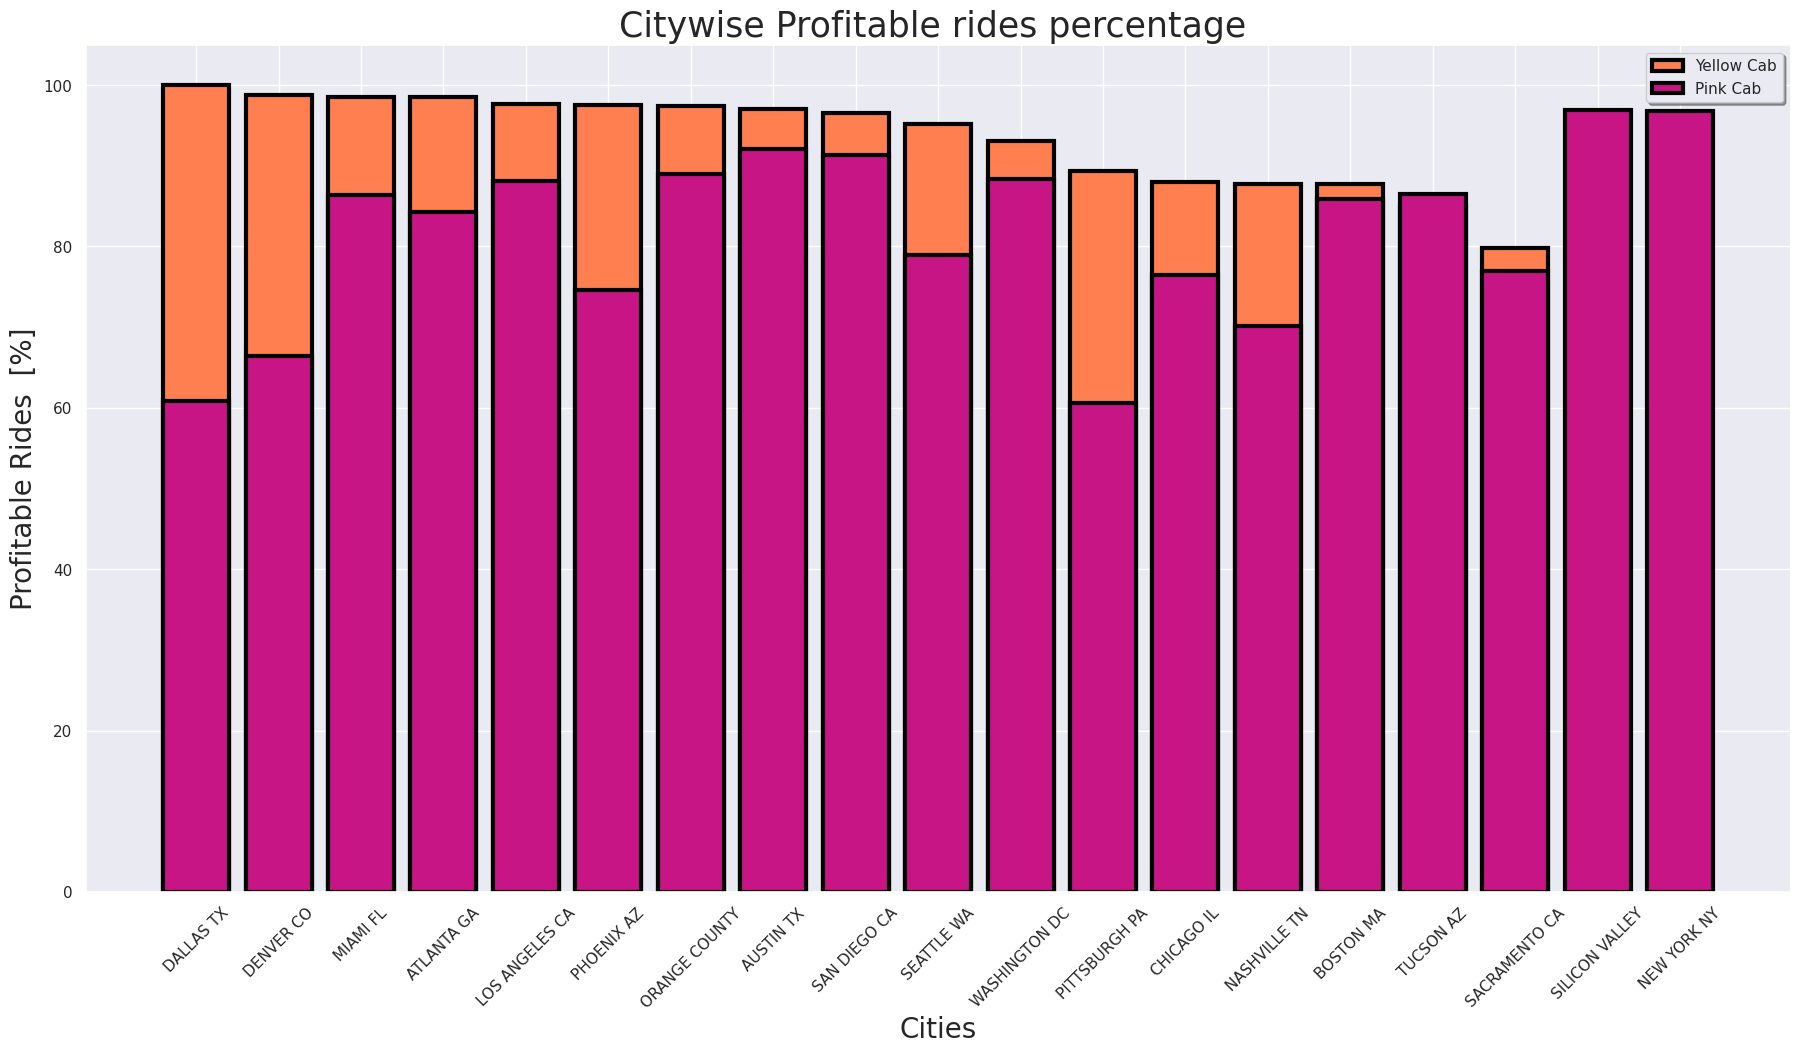

In [ ]:
plt.figure(figsize=(22,11))
plt.bar(x= yellowcabnp.index, height='per', data = yellowcabnp,edgecolor = 'black',color = 'coral',linewidth=3,label='Yellow Cab',)
plt.bar(x= pinkcabnp.index, height='per', data = pinkcabnp,edgecolor = 'black',color = 'mediumvioletred',linewidth=3,label='Pink Cab',)
plt.xticks(rotation=45)
plt.ylabel('Profitable Rides  [%]', fontsize=20)
plt.title('Citywise Profitable rides percentage ', fontsize = 25)
plt.legend(loc='upper right', shadow=True)
plt.xlabel('Cities', fontsize=20)

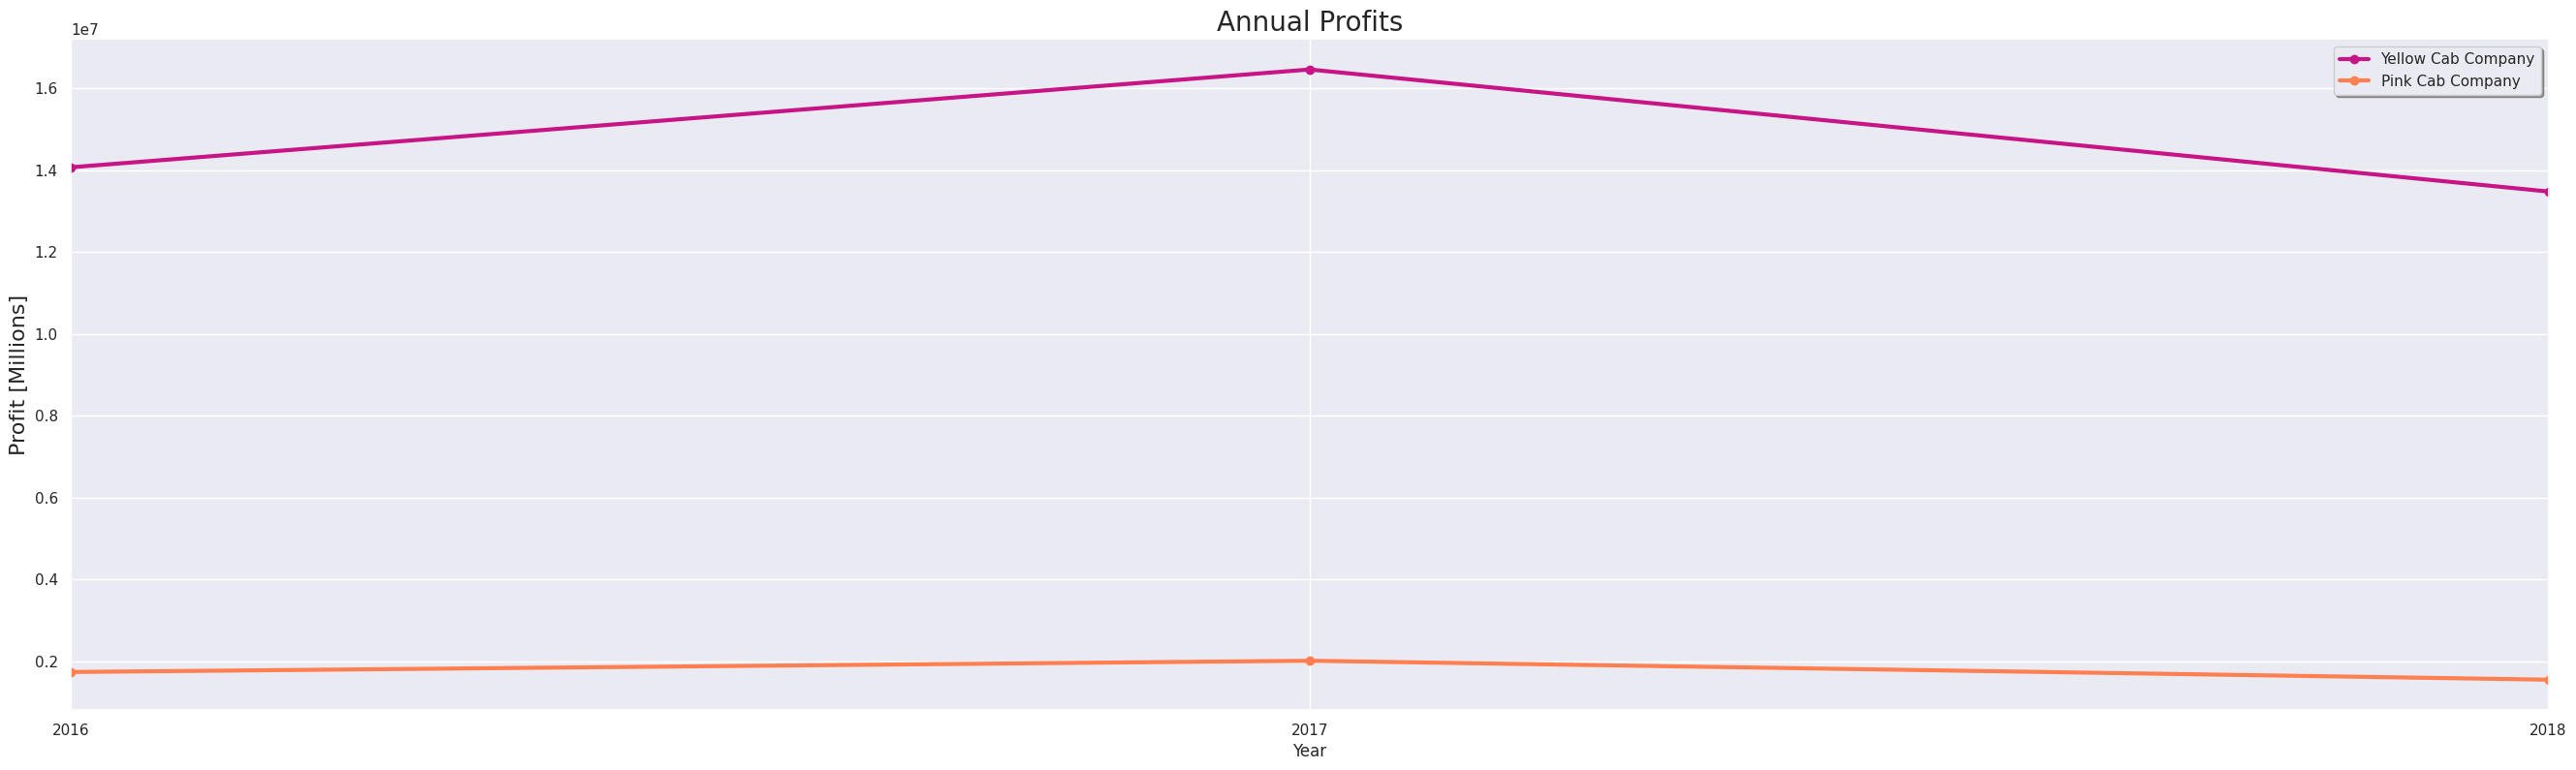

In [ ]:
plt.figure(figsize=(33,9))

fig= yellowcabst.Profit.resample('Y').sum().plot.line(color = 'mediumvioletred',label='Yellow Cab Company',linewidth=3, marker='o')
fig=pinkcabst.Profit.resample('Y').sum().plot.line(color = 'coral',label='Pink Cab Company',linewidth=3, marker='o')
plt.ylabel('Profit [Millions]', fontsize=16)
plt.title('Annual Profits',fontsize=20)
plt.xlabel('Year')

plt.legend(loc='best', shadow=True)

In [ ]:
round(masterdata.groupby(['Company']).Profit.sum().to_frame('Total Profit'),0)

,Total Profit
Company,
Pink Cab,5307328.0
Yellow Cab,44020373.0


YellowCab's profits over the last 3 years are eight times higher than PinkCab's Company


